Group Members : CHEREL Bastien - MAALOUL Ahmed - FAYOLLE Aramis - EMMAULT Thibault 


## TUTORIAL 4: EXPLAINABILITY AI

### Question 2.

* Select a dataset on Kaggle that seems interesting for the group. The dataset must contain explanatory variables that can be interpreted.

https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [196]:
import pandas as pd 

data = pd.read_csv("housing.csv")

In [197]:
# Convert the median income from ten thousands $ to $ 
data["median_income"] *= 10000

# Remove the outliers (e.g. herer 500,000 was a ceiling value)
data = data[data["median_house_value"] < 500000]
data = data[data["housing_median_age"] < 50]
data = data[data["housing_median_age"] > 1]

# Remove the people that lives on an island not relevant <1%
data = data[data["ocean_proximity"]!="ISLAND"]

In [198]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,20804.0,226700.0,NEAR BAY
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,13578.0,147500.0,NEAR BAY
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,17135.0,159800.0,NEAR BAY


### Question 3.
Let’s begin with some visualisations.
* Based on your intuition what are the most important variables for predicting your target variable?

To predict the median house value the most important variables may be : the median income, the ocean proximity and the total rooms.



* Create visualisations that take into account the type of variable (categorical, numerical) that show
the correlation of the features you selected.


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

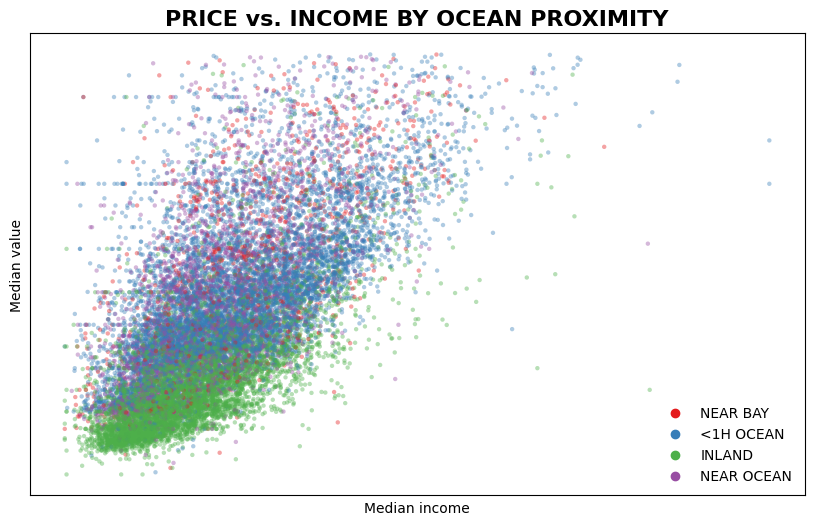

In [200]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="median_income", y="median_house_value", palette = "Set1",hue="ocean_proximity", marker="o",s=10,linewidth=0, alpha = 0.4)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title("PRICE vs. INCOME BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)


legend.remove()  # Remove the default legend
plt.legend(title_fontsize=12, loc='lower right', frameon = False)
plt.tick_params(left=False, right=False, labelleft=False)
plt.xlabel("Median income")
plt.ylabel("Median value")
plt.show()

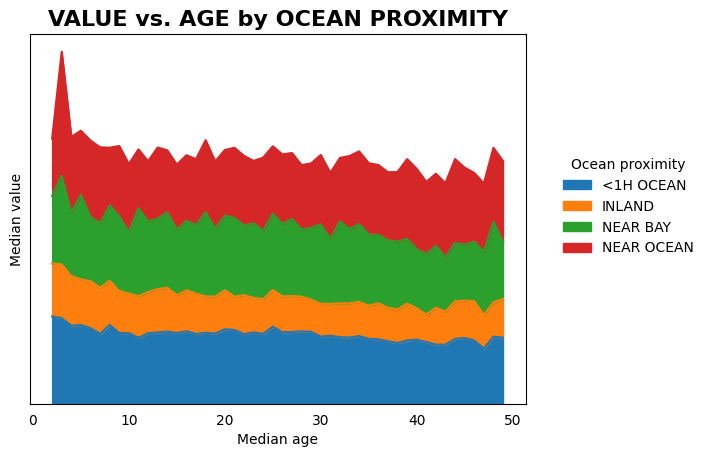

In [201]:
import numpy as np

df_counts = data.groupby(['housing_median_age', 'ocean_proximity'])['median_house_value'].mean().unstack()
ax = df_counts.plot(kind='area', stacked=True)

# Set title and axis labels
plt.title("VALUE vs. AGE by OCEAN PROXIMITY", fontsize=16, fontweight='bold')
plt.xlabel("Median age")
plt.ylabel("Median value")

# Customize ticks and labels
plt.tick_params(left=False, bottom=False, labelleft=False)
plt.xticks(rotation=0)

# Adjust legend position and remove frame
plt.legend(title="Ocean proximity", bbox_to_anchor=(1.05, 0.7), frameon=False)


# Show the plot
plt.show()


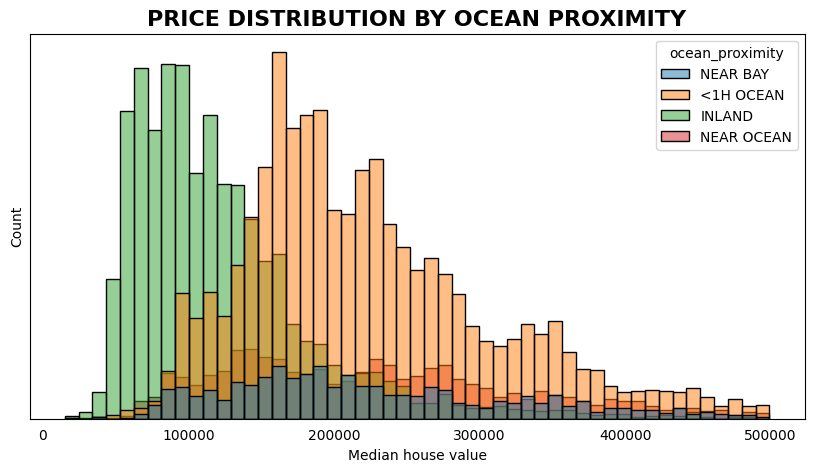

In [202]:
plt.figure(figsize=(10, 5))
seaborn_legend = sns.histplot(data, x="median_house_value", hue="ocean_proximity", fill=True, legend=True)
plt.tick_params(left = False, right = False , labelleft = False , bottom = False) 
plt.xlabel("Median house value")
plt.title("PRICE DISTRIBUTION BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
plt.show()

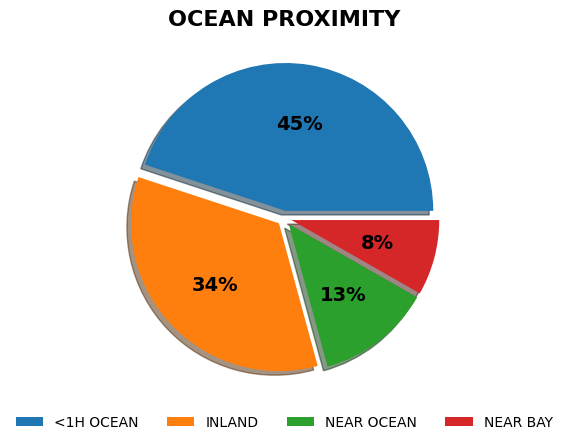

In [203]:
plt.style.use("default")

# Create pie chart
array = data["ocean_proximity"].value_counts()
ax = array.plot(kind="pie", startangle=0,
                shadow=True, legend=True, ylabel="", textprops={'weight': 'bold', 'size': 14},
                autopct='%1.0f%%', pctdistance=.6, labeldistance=None, explode=[0.05 for _ in range(len(array))])

# Adjust legend position
ax.legend(bbox_to_anchor=(0.5, -0), loc='upper center', frameon=False, ncol=len(array))

plt.title("OCEAN PROXIMITY", fontsize=16, fontweight='bold')
plt.show()

In [204]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Create GeoDataFrame with 'latitude' and 'longitude' columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plot the GeoDataFrame with a basemap
fig, ax = plt.subplots(figsize=(10, 10))

gdf.crs = "EPSG:4326"
# Plot the GeoDataFrame
plot = gdf.plot(ax=ax, column='median_house_value', cmap='viridis', alpha=0.5, markersize=7, legend=False)

ctx.add_basemap(ax, crs = gdf.crs.to_string())

cbar = plt.colorbar(plot.collections[0], ax=ax, orientation='vertical', shrink=0.75)
cbar.set_label('Median house value')
# Show the plot
plt.title('CALIFORNIAN MAP',fontsize=16, fontweight='bold')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.show()

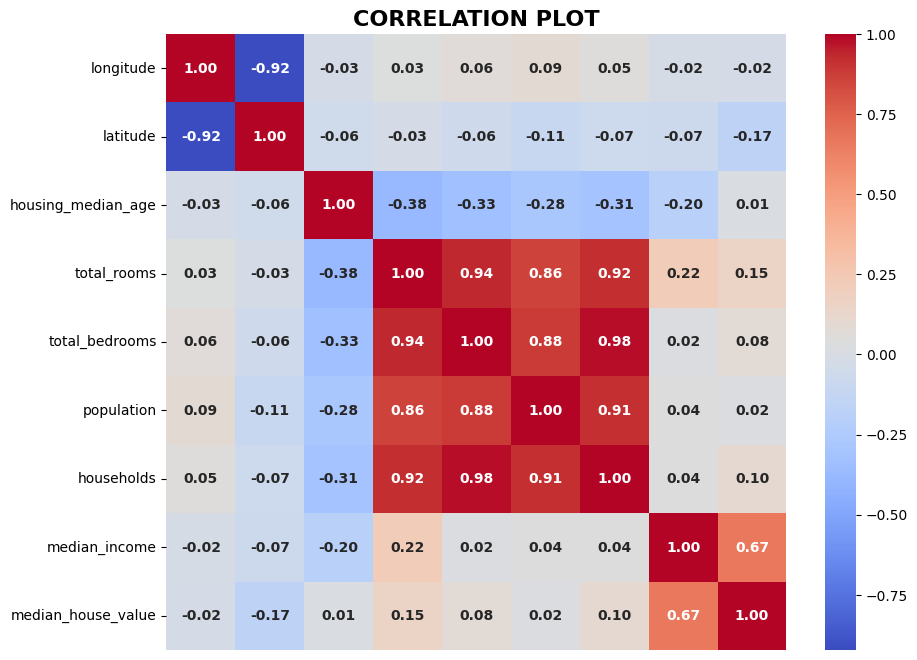

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "fontweight" :"bold"}, xticklabels=False)
plt.title('CORRELATION PLOT', fontsize=16, fontweight = "bold")
plt.xlabel("")
plt.show()

* Don’t forget to clean your dataset as needed in order to deal with missing values and outliers

In [ ]:
# Drop the points when a value is missing
data = data.dropna()

data["ocean_proximity"] = data["ocean_proximity"].replace("<1H OCEAN", "LESS 1H")

# Drop useless columns
data = data.drop(columns=["latitude","longitude", "total_bedrooms",	"population", "households"])

### Question 4.
Let’s do a linear regression.
* Do the variable transformations that are needed (on hot encoding, log etc...)


In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
data = pd.get_dummies(data, columns = non_numeric_columns, drop_first=False)
data

,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_LESS 1H,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,83252.0,452600.0,0,0,1,0
1,21.0,7099.0,83014.0,358500.0,0,0,1,0
8,42.0,2555.0,20804.0,226700.0,0,0,1,0
20,40.0,751.0,13578.0,147500.0,0,0,1,0
21,42.0,1639.0,17135.0,159800.0,0,0,1,0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,15603.0,78100.0,1,0,0,0
20636,18.0,697.0,25568.0,77100.0,1,0,0,0
20637,17.0,2254.0,17000.0,92300.0,1,0,0,0
20638,18.0,1860.0,18672.0,84700.0,1,0,0,0


* Fit the linear regression


In [ ]:
# Select features and target variable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "median_house_value"

# Extract features and target variable
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse_linear:.3f}")
print(f"R-squared: {r2_linear:.3f}")


Root Mean Squared Error: 61372.484
R-squared: 0.576


* Interpret the coeﬀicients of your regression


In [ ]:
# Access coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_
feature_names = X.columns.to_numpy()

# Print the coefficients and intercept
print("Features :", feature_names)
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept:.3f}")

Features : ['housing_median_age' 'total_rooms' 'median_income'
 'ocean_proximity_INLAND' 'ocean_proximity_LESS 1H'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
Coefficients: [ 6.93956308e+02  2.53752214e+00  3.58873025e+00 -5.39464762e+04
  1.34209426e+04  1.06533470e+04  2.98721866e+04]
Intercept: 39095.147


* Does any coeﬀicient contradict your intuition?

We didn't think that the median age would be so significant; in fact, exactly as we thought, the closer the house is to the ocean, the higher the price.

### Question 5.
Let’s build a more complex model
* Build the ”best” model you can using traditional data science (no deep learning)
* Don’t hesitate to fine tune it, try different combination of variables etc



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "median_house_value"

# Assuming 'data' is your DataFrame and contains the target and features.

# Extract features and target variable
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 200
}
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(**best_params, random_state=42)

# Fit GridSearchCV to the data
random_forest_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = random_forest_model.predict(X_test)


* What is the best metric you can reach? Can you consider it ”good”


In [ ]:
# Evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")

Root Mean Squared Error: 59771.948
R-squared: 0.598


* Given your results what use case can be done with this model?

Automatically predict house prices in the agency application

### Question 6.
Using shapley values explain your model
* Start by giving some forceplot examples


In [ ]:
import shap

rf_explainer = shap.TreeExplainer(random_forest_model)

rf_shap_values = rf_explainer.shap_values(X_test)

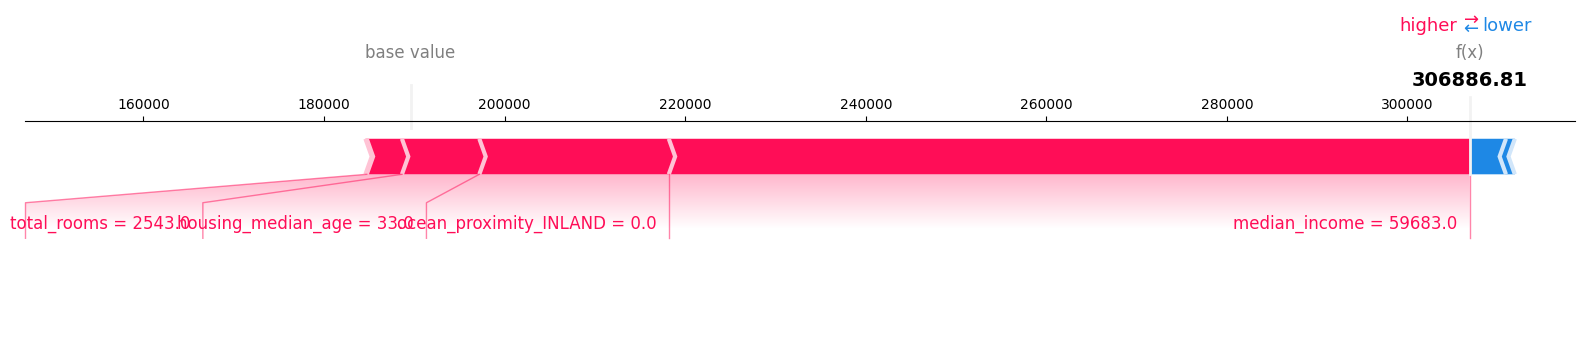

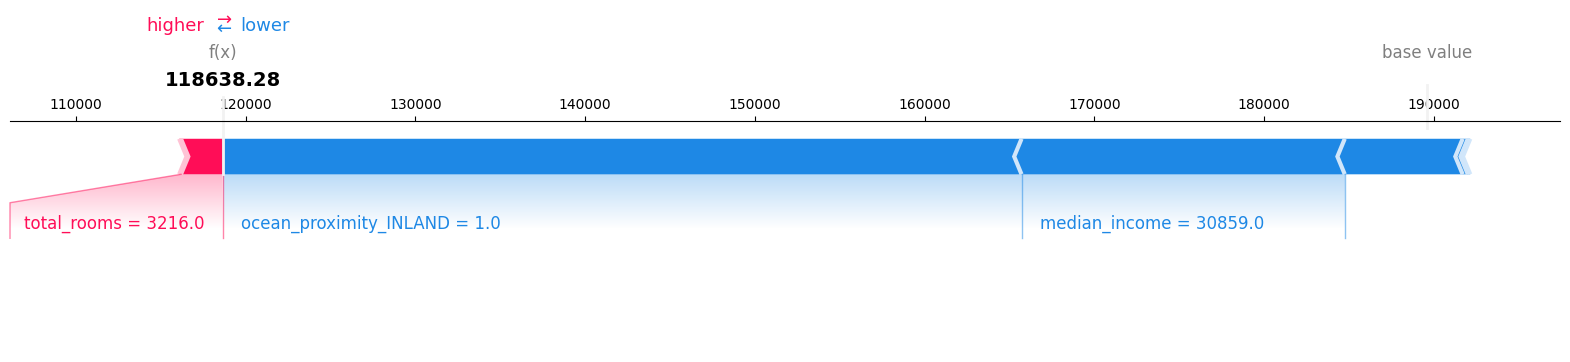

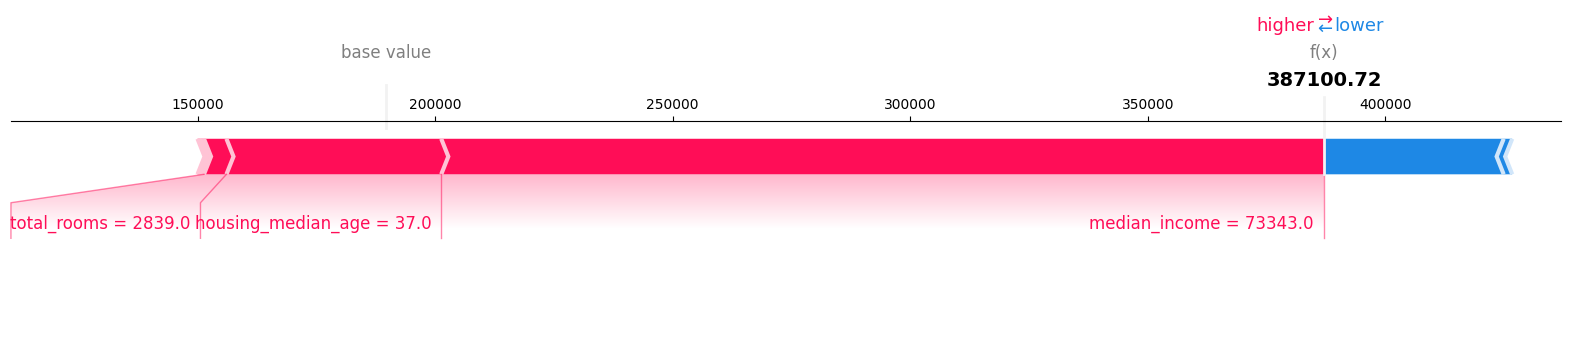

In [ ]:
sample_indices = [0, 1, 2]  

for i, idx in enumerate(sample_indices):
    shap.force_plot(rf_explainer.expected_value, rf_shap_values[idx], features=X_test.iloc[idx], feature_names=X_train.columns,matplotlib=True, show=True)
    plt.tight_layout
    plt.show()

* Use the feature importance and identify the most important variables


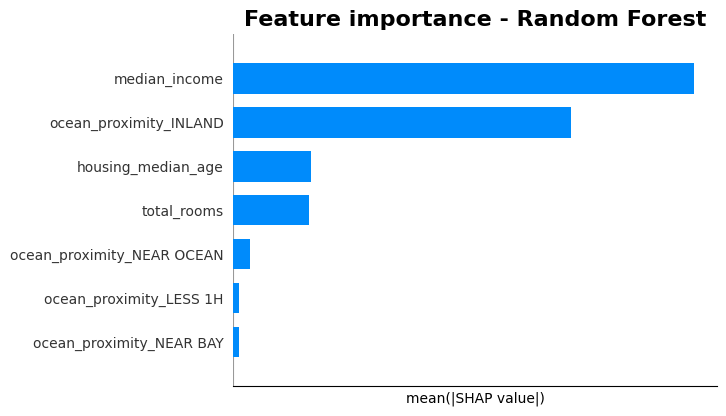

In [ ]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar", show = False)
plt.title("Feature importance - Random Forest",fontsize=16, fontweight = "bold")
plt.xlabel("mean(|SHAP value|)",fontdict={'fontsize': 10})
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = False, bottom = False) 
plt.tick_params(axis='y', labelsize=10)
plt.show()

* Compare them to the variables identified in the linear regression


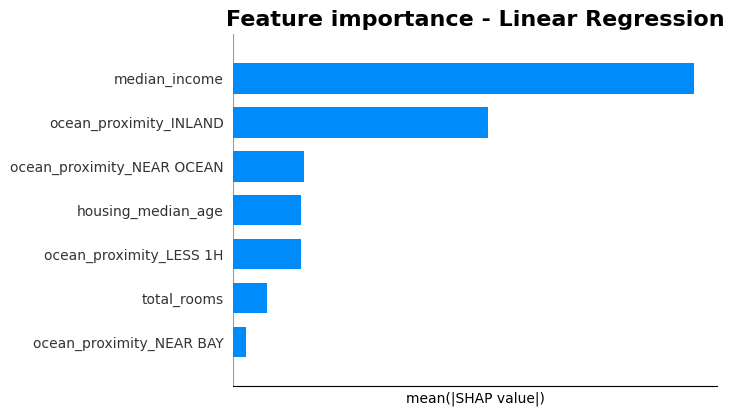

In [ ]:
sample_indices = [0, 1, 2]  # Select a few samples for visualization
linear_explainer = shap.Explainer(linear_model, X_train)

linear_shap_values = linear_explainer.shap_values(X_train)


shap.summary_plot(linear_shap_values, X_test, plot_type="bar", show = False)
plt.title("Feature importance - Linear Regression",fontsize=16, fontweight = "bold")
plt.xlabel("mean(|SHAP value|)",fontdict={'fontsize': 10})
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = False, bottom = False) 
plt.tick_params(axis='y', labelsize=10)
plt.show()

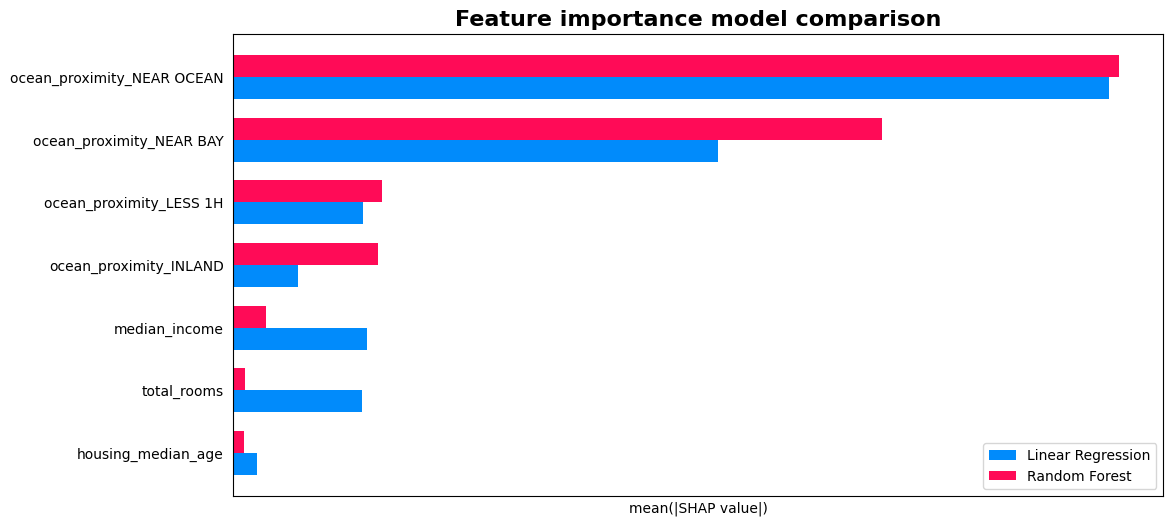

In [ ]:
# Calculate the mean absolute SHAP values for both models
linear_shap_mean = np.abs(linear_shap_values).mean(axis=0)
rf_shap_mean = np.abs(rf_shap_values).mean(axis=0)

# Sort the feature names based on the mean absolute SHAP values of the Random Forest model
sorted_indices = np.argsort(rf_shap_mean)  # Descending order

# Reorder the feature names and their corresponding SHAP values
sorted_feature_names = feature_names[sorted_indices]
sorted_linear_shap_mean = linear_shap_mean[sorted_indices]
sorted_rf_shap_mean = rf_shap_mean[sorted_indices]

N = linear_shap_values.shape[1]  # Number of features
ind = np.arange(N)  # Position of bars on x-axis
height = 0.35  # Width of bars
feature_names = X.columns

# Generate summary SHAP plots for each model
plt.figure(figsize=(12, 6))

# Plot bars for the first model
plt.barh(ind, sorted_linear_shap_mean, height, label='Linear Regression', color='#018BFB')

# Plot bars for the second model, shift them to the right
plt.barh(ind + height, sorted_rf_shap_mean, height, label='Random Forest', color='#FF0B57')


plt.xlabel("mean(|SHAP value|)",fontdict={'fontsize': 10})
plt.title('Feature importance model comparison',fontsize=16, fontweight = "bold")
plt.legend(title = "Models")
plt.yticks(ind + height / 2, feature_names)
plt.tick_params(left = False, right = False , labelleft = True ,labelbottom = False, bottom = False) 
plt.tick_params(axis='y', labelsize=10)
# Add legend
plt.legend()

plt.show()

* Using the beeswarm plot explain the model behaviour for the most important variables


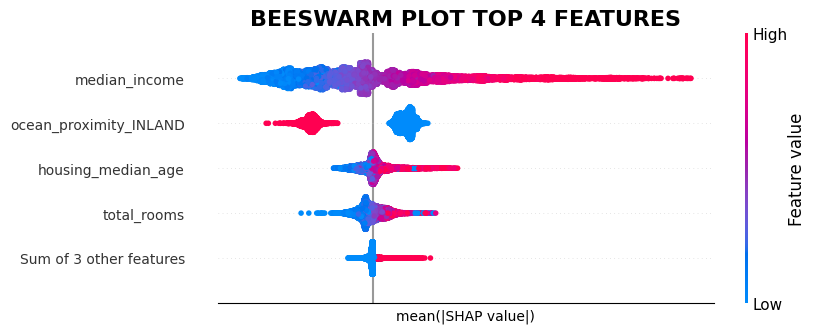

In [ ]:
rf_shap_obj = rf_explainer(X)

# Display 4 most important
shap.plots.beeswarm(rf_shap_obj, max_display= 5, show = False)
plt.title("BEESWARM PLOT TOP 4 FEATURES",fontsize=16, fontweight = "bold")
plt.xlabel("mean(|SHAP value|)",fontdict={'fontsize': 10})
plt.tick_params(left = False, right = False , labelleft = True , 
                labelbottom = False, bottom = False) 
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(left=False, bottom=False, )
plt.show()

* Use dependance plots in order to understand the behaviour of the most important variables


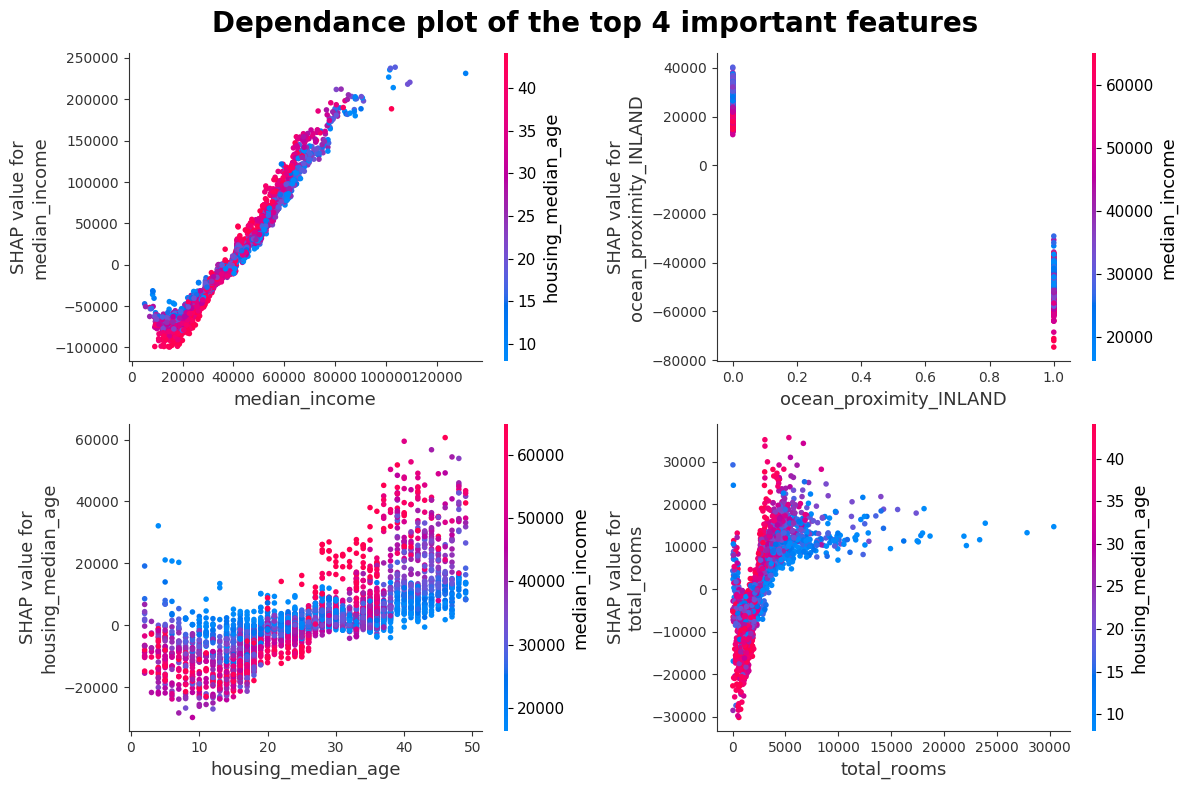

In [ ]:
# Get the indices of the most important features based on SHAP values
top_features_indices = np.argsort(np.abs(rf_shap_values).mean(0))[::-1][:4]  # Select top 4 features

# Number of top features to display
num_top_features = len(top_features_indices)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, feature_idx in enumerate(top_features_indices):
    shap.dependence_plot(feature_idx, rf_shap_values, X_test, feature_names=X_test.columns, ax=axs[i//2, i%2], show=False)
    
    # Customizing y-axis font properties for each subplot
    axs[i//2, i%2].tick_params(axis='y', labelsize=10)
    axs[i//2, i%2].tick_params(axis='x', labelsize=10)
    
    plt.tick_params(axis='y', labelsize=10)
    axs 
fig.suptitle('Dependance plot of the top 4 important features', fontsize = 20, fontweight = "bold")
plt.tight_layout()
plt.show()

### Question 7.
We will now do a clustering of shapley values.
* Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.


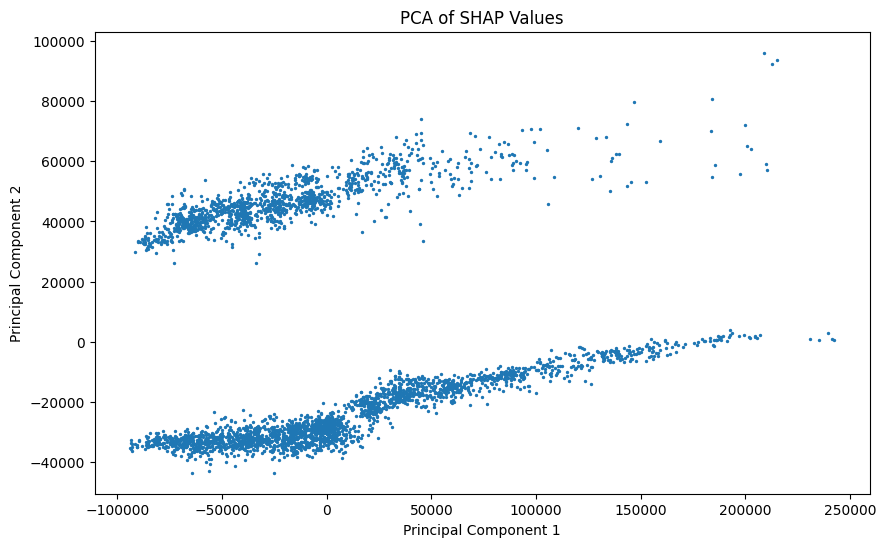

In [ ]:
from sklearn.decomposition import PCA

# Compute PCA
pca = PCA(n_components = 2)
shap_values_reduced = pca.fit_transform(rf_shap_values)

# Plot the PCA-transformed SHAP values
plt.figure(figsize=(10, 6))
plt.scatter(shap_values_reduced[:, 0], shap_values_reduced[:, 1], s = 2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SHAP Values')
plt.show()

* Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=32000, min_samples=5).fit(shap_values_reduced)

labels = dbscan.labels_

cluster_labels = dbscan.fit_predict(shap_values_reduced)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 2


* Visualise your results


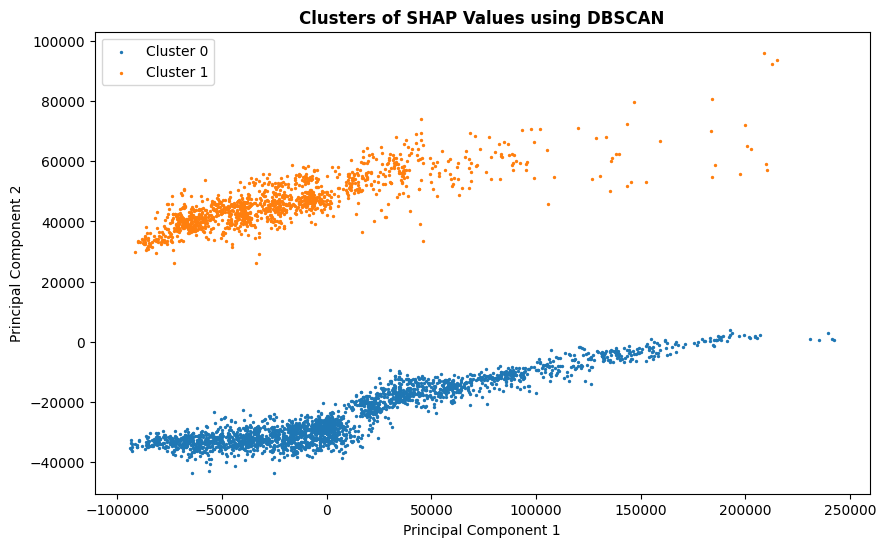

In [ ]:
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters_):
    plt.scatter(shap_values_reduced[cluster_labels == cluster_label, 0],
                shap_values_reduced[cluster_labels == cluster_label, 1],
                s = 2,
                label=f'Cluster {cluster_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of SHAP Values using DBSCAN', fontweight = "bold")
plt.legend()
plt.show()

* What characteristics can you give to each cluster?


The two clusters, appear to be separated mainly along the Principal Component 2 axis.

The cluster 1, which spans a smaller range on Principal Component 2, represent a group of predictions where the features have similar SHAP values. These could be properties with average or typical values for median_income, total_rooms, housing_median_age, and ocean_proximity categories.

The cluster 0 shows a wider spread along Principal Component 1, suggesting a more diverse impact of features on the model's predictions. This might be associated with properties that have more extreme or less common values for the features.

* What conclusion can you reach?

The use of PCA suggests that the SHAP values for different features have been reduced to a smaller set
 of uncorrelated components. Principal Component 2 might be capturing the most variance in SHAP values across features, 
while Principal Component 1 captures the second most.

The separation along Principal Component 2 indicates that one or more features have a wide range of effects on the model's predictions. For instance, median_income might have a broad range of SHAP values, significantly impacting the model's prediction of median house value.

The features ocean_proximity_INLAND, ocean_proximity_LESS_1H, ocean_proximity_NEAR BAY, and ocean_proximity_NEAR OCEAN suggest a geographical component to housing prices. It's possible that Cluster 2 represents properties closer to the ocean, which could have higher variances in their pricing and hence a wider distribution of SHAP values.

Clustering SHAP values can help in identifying patterns in model predictions, and can be particularly useful in spotting systemic biases or consistencies in model behavior. For instance, if one cluster represents higher-value properties and the other lower-value ones, that might reflect in the corresponding SHAP values.